- The results from the validation of three cases has been analzed here:


Note:
- All of the input files was generated from the jupyter notebooks: {Case_name}_pestpp_fileprep
- The outputs was analyzed from the jupyter notebooks: Output_analysis_{Case_name}. The corresponding files were extracted from these jupyter notebook to be analyzed here.

The following files will be analyzed in this notebook:
1. Objective function after each iteration
2. Residual files (for the least objective function) - With the simulated temperature and moisture
3. Parameter files (for the least objective function) 
4. Sensitivity files (for the least objective function)

A comparison for the three cases will be made here!

In [1]:
#import sys
#sys.path.insert(0,'../pestools')

In [2]:
import os
main_cwd = os.getcwd()
print(main_cwd)

D:\Github\datamshapratirupa\6_valid


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from matplotlib.ticker import MaxNLocator
#import parsen

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

### Reading the observations

In [6]:
df_obs_AWS = pd.read_csv('../1_data_prep/Final_OutputData_4yrs/Validate_outputdata_2019.csv',sep='\t')
df_obs_AWS.head()

,TIMESTAMP,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
0,2019-01-01,6.423472,7.538778,8.086528,8.609306,5.178132,3.371944,4.453563,-16.513194,-16.174306,-14.436319,-13.870417,-12.438125,-10.238264,-7.024076,-5.411375
1,2019-01-02,6.463458,7.577208,8.120833,8.615139,5.161292,3.348535,4.425410,-15.900486,-15.641042,-13.958611,-13.513819,-12.308611,-10.330208,-7.259861,-5.616632
2,2019-01-03,6.458368,7.578368,8.129028,8.620347,5.153854,3.329340,4.399389,-16.385139,-15.791528,-14.019931,-13.464583,-12.218889,-10.348611,-7.443604,-5.803431
3,2019-01-04,6.441076,7.562042,8.118333,8.615000,5.151160,3.313813,4.376812,-16.919028,-16.036181,-14.217222,-13.575208,-12.252083,-10.388333,-7.572201,-5.965312
4,2019-01-05,6.434840,7.551556,8.103681,8.597500,5.139132,3.301118,4.357840,-17.339306,-16.176042,-14.359722,-13.716250,-12.376875,-10.484514,-7.692111,-6.111090


In [7]:
df_obs_AWS_III = pd.read_csv('../1_data_prep/Final_OutputData_Case3/Valid_outputdata_Case3_2017.csv',sep='\t')
df_obs_AWS_III.head()

,TIMESTAMP,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
0,2017-01-01,8.001889,8.352500,8.502500,8.952083,5.408938,3.765458,5.415479,-12.807778,-12.126736,-11.403750,-10.977778,-9.902153,-8.312083,-5.657743,-4.284076
1,2017-01-02,8.008944,8.363681,8.515347,8.959236,5.403771,3.747493,5.377924,-13.721104,-12.143333,-11.357708,-10.903542,-9.815208,-8.296667,-5.790653,-4.451597
2,2017-01-03,8.001986,8.356250,8.513264,8.958819,5.386264,3.732201,5.312049,-13.513736,-12.295139,-11.472361,-10.965417,-9.805000,-8.309931,-5.898486,-4.594007
3,2017-01-04,8.016035,8.365417,8.515694,8.953472,5.380111,3.718479,5.282632,-12.564931,-12.117292,-11.363750,-10.923194,-9.844306,-8.356181,-5.995306,-4.716979
4,2017-01-05,8.037118,8.386875,8.527569,8.957500,5.374840,3.706326,5.251993,-12.385111,-11.802986,-11.108819,-10.740208,-9.785764,-8.384167,-6.089104,-4.832729


### Reading the results

In [8]:
case1_obs = pd.read_csv('Case1_valid.demo/observations.dat',skiprows=190,sep=' ')
case2_obs = pd.read_csv('Case2_valid.demo/observations.dat',skiprows=262,sep=' ')
case3_obs = pd.read_csv('Case3_valid.demo/observations.dat',skiprows=220,sep=' ')


case1_obs.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -5.0 temperature [K],point -10.0 temperature [K],...,point -0.01 saturation ice,point -0.04 saturation ice,point -0.1 saturation ice,point -0.2 saturation ice,point -0.4 saturation ice,point -0.8 saturation ice,point -1.2 saturation ice,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice
0,0.0,258.367326,259.833831,261.545082,262.858144,264.988292,266.860213,268.139169,270.389262,269.083891,...,0.102650,0.102650,0.060400,0.018961,0.298879,0.736122,0.838199,0.838198,0.83818,0.838193
1,86400.0,258.085749,259.926209,261.941854,263.098426,264.941297,266.711694,267.981089,270.379574,269.087661,...,0.102679,0.102679,0.060391,0.018927,0.298875,0.736120,0.838185,0.838198,0.83818,0.838193
2,172800.0,257.808060,259.854924,261.986541,263.159634,264.923528,266.602095,267.842474,270.367917,269.091431,...,0.102709,0.102709,0.060398,0.018923,0.298875,0.736119,0.838175,0.838199,0.83818,0.838193
3,259200.0,257.392283,259.631060,261.907985,263.130794,264.885591,266.505970,267.717345,270.354776,269.095199,...,0.102754,0.102754,0.060420,0.018930,0.298875,0.736118,0.838166,0.838199,0.83818,0.838193
4,345600.0,257.022062,259.381274,261.775674,263.048973,264.824391,266.413789,267.601784,270.340197,269.098964,...,0.102797,0.102797,0.060444,0.018941,0.298876,0.736116,0.838157,0.838200,0.83818,0.838192


In [9]:
# Converting seconds to days

case1_obs['time [days]'] = case1_obs['time [s]']/86400
case2_obs['time [days]'] = case2_obs['time [s]']/86400
case3_obs['time [days]'] = case3_obs['time [s]']/86400

In [10]:
### Temperature from degree celcius to Kelvin

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, depth in enumerate(depths):
    case1_obs[f'Soil temperature at - {depth} m (°C)'] = case1_obs[f'point -{depth} temperature [K]'] - 273.15
    case2_obs[f'Soil temperature at - {depth} m (°C)'] = case2_obs[f'point -{depth} temperature [K]'] - 273.15
    case3_obs[f'Soil temperature at - {depth} m (°C)'] = case3_obs[f'point -{depth} temperature [K]'] - 273.15


case1_obs.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -5.0 temperature [K],point -10.0 temperature [K],...,point -5.0 saturation ice,point -10.0 saturation ice,time [days],Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
0,0.0,258.367326,259.833831,261.545082,262.858144,264.988292,266.860213,268.139169,270.389262,269.083891,...,0.83818,0.838193,0.0,-14.782674,-13.316169,-11.604918,-10.291856,-8.161708,-6.289787,-5.010831
1,86400.0,258.085749,259.926209,261.941854,263.098426,264.941297,266.711694,267.981089,270.379574,269.087661,...,0.83818,0.838193,1.0,-15.064251,-13.223791,-11.208146,-10.051574,-8.208703,-6.438306,-5.168911
2,172800.0,257.808060,259.854924,261.986541,263.159634,264.923528,266.602095,267.842474,270.367917,269.091431,...,0.83818,0.838193,2.0,-15.341940,-13.295076,-11.163459,-9.990366,-8.226472,-6.547905,-5.307526
3,259200.0,257.392283,259.631060,261.907985,263.130794,264.885591,266.505970,267.717345,270.354776,269.095199,...,0.83818,0.838193,3.0,-15.757717,-13.518940,-11.242015,-10.019206,-8.264409,-6.644030,-5.432655
4,345600.0,257.022062,259.381274,261.775674,263.048973,264.824391,266.413789,267.601784,270.340197,269.098964,...,0.83818,0.838192,4.0,-16.127938,-13.768726,-11.374326,-10.101027,-8.325609,-6.736211,-5.548216


In [11]:
### Saturation of liquid to Volumetric Water Content (VWC - %)

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

depth_peat = 0.3

poro_peat_1 = 0.63840773749824
poro_mineral_1 = 0.48163834735695

poro_peat_2 = 0.42152389790647
poro_mineral_2 = 0.36232061622228

poro_peat_3 = 0.64661880775129
poro_mineral_3 = 0.48321096221786



for i, depth in enumerate(depths):
    if depth < depth_peat:
        case1_obs[f'Soil moisture at - {depth} m (%)'] = case1_obs[f'point -{depth} saturation liquid']*(poro_peat_1*100)
        case2_obs[f'Soil moisture at - {depth} m (%)'] = case2_obs[f'point -{depth} saturation liquid']*(poro_peat_2*100)
        case3_obs[f'Soil moisture at - {depth} m (%)'] = case3_obs[f'point -{depth} saturation liquid']*(poro_peat_3*100)
    else:
        case1_obs[f'Soil moisture at - {depth} m (%)'] = case1_obs[f'point -{depth} saturation liquid']*(poro_mineral_1*100)
        case2_obs[f'Soil moisture at - {depth} m (%)'] = case2_obs[f'point -{depth} saturation liquid']*(poro_mineral_2*100)
        case3_obs[f'Soil moisture at - {depth} m (%)'] = case3_obs[f'point -{depth} saturation liquid']*(poro_mineral_3*100)

### Plotting the results

#### Plotting Case 1 results

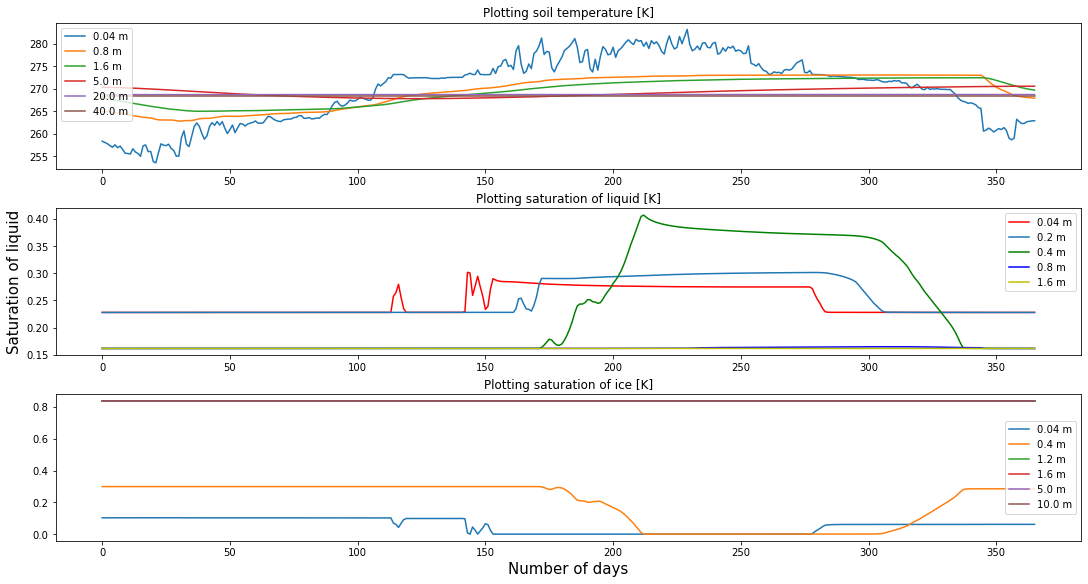

In [12]:
### Plotting the final results (mesured vs simulated) along with the parameters:

fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case1_obs['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_case1['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_case1['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(case1_obs['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_case1['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(case1_obs['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(case1_obs['point -5.0 temperature [K]'],label='5.0 m')
#f2_ax1.plot(df_case1['point -10.0 temperature [K]'],label='10.0 m')
f2_ax1.plot(case1_obs['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(case1_obs['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case1_obs['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
f2_ax2.plot(case1_obs['point -0.4 saturation liquid'],'g',label='0.4 m')
f2_ax2.plot(case1_obs['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(case1_obs['point -1.6 saturation liquid'],'y',label='1.6 m')
#f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'],'r--',label='s - 0.04 m')
#f2_ax2.plot(df_obs_AWS['point -0.4 saturation liquid'],'g--',label='s - 0.4 m')
#f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'],'b--',label='s - 0.8 m')
#f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'],'y--',label='s - 1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('Saturation of liquid',fontsize=15)

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case1_obs['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_case1['point -0.2 saturation ice'],label='0.2 m')
f2_ax3.plot(case1_obs['point -0.4 saturation ice'],label='0.4 m')
#f2_ax3.plot(df_case1['point -0.8 saturation ice'],label='0.8 m')
f2_ax3.plot(case1_obs['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(case1_obs['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(case1_obs['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(case1_obs['point -10.0 saturation ice'],label='10.0 m')
f2_ax3.set_xlabel('Number of days',fontsize=15)
f2_ax3.legend()

#### Plotting Case 2 results

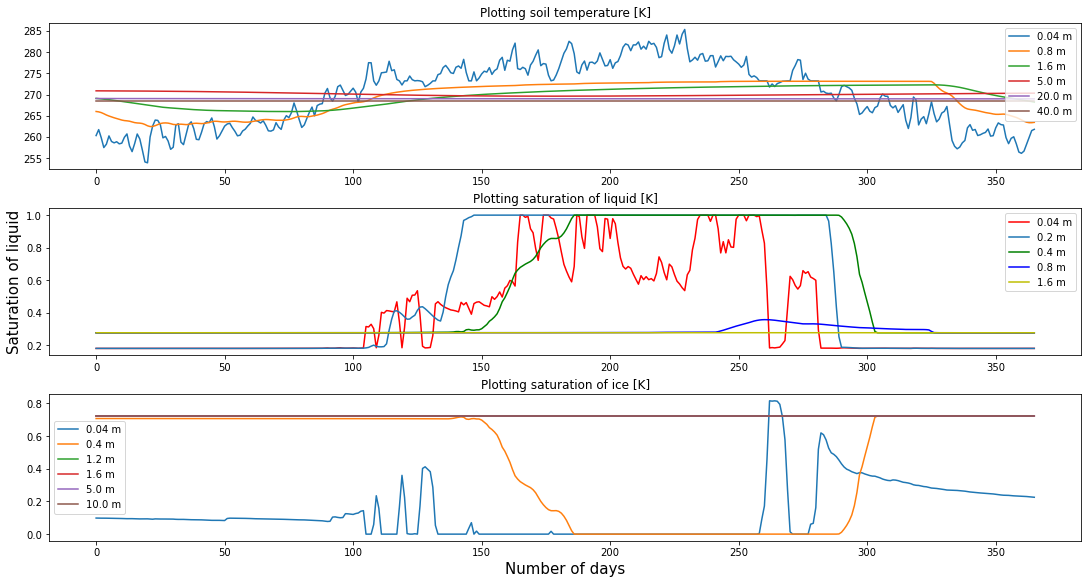

In [13]:
### Plotting the final results (mesured vs simulated) along with the parameters:

fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case2_obs['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_case1['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_case1['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(case2_obs['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_case1['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(case2_obs['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(case2_obs['point -5.0 temperature [K]'],label='5.0 m')
#f2_ax1.plot(df_case1['point -10.0 temperature [K]'],label='10.0 m')
f2_ax1.plot(case2_obs['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(case2_obs['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case2_obs['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(case2_obs['point -0.2 saturation liquid'],label='0.2 m')
f2_ax2.plot(case2_obs['point -0.4 saturation liquid'],'g',label='0.4 m')
f2_ax2.plot(case2_obs['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(case2_obs['point -1.6 saturation liquid'],'y',label='1.6 m')
#f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'],'r--',label='s - 0.04 m')
#f2_ax2.plot(df_obs_AWS['point -0.4 saturation liquid'],'g--',label='s - 0.4 m')
#f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'],'b--',label='s - 0.8 m')
#f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'],'y--',label='s - 1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('Saturation of liquid',fontsize=15)

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case2_obs['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_case1['point -0.2 saturation ice'],label='0.2 m')
f2_ax3.plot(case2_obs['point -0.4 saturation ice'],label='0.4 m')
#f2_ax3.plot(df_case1['point -0.8 saturation ice'],label='0.8 m')
f2_ax3.plot(case2_obs['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(case2_obs['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(case2_obs['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(case2_obs['point -10.0 saturation ice'],label='10.0 m')
f2_ax3.set_xlabel('Number of days',fontsize=15)
f2_ax3.legend()

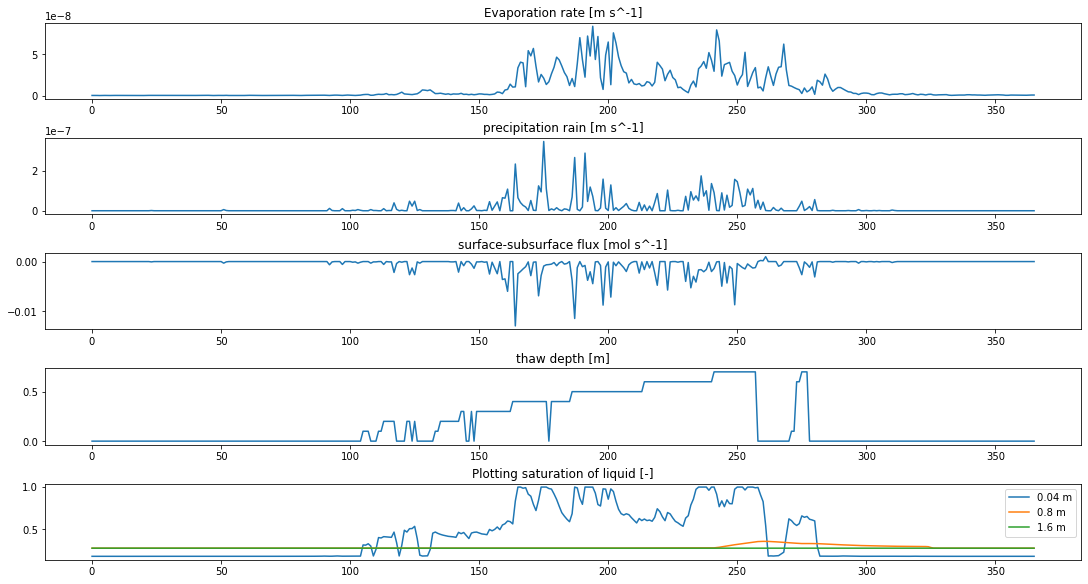

In [14]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

# Plotting Evaporation rate
f2_ax1.set_title('Evaporation rate [m s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case2_obs['evaporation rate [m s^-1]'])

# Plotting precipitation rate
f2_ax2.set_title('precipitation rain [m s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case2_obs['precipitation rain [m s^-1]'])

# Plotting surface-subsurface flux [mol s^-1]
f2_ax3.set_title('surface-subsurface flux [mol s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case2_obs['surface-subsurface flux [mol s^-1]'])

# Plotting surface-subsurface flux [mol s^-1]
f2_ax4.set_title('thaw depth [m]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(case2_obs['thaw depth [m]'])

# Plotting saturation of liquid
f2_ax5.set_title('Plotting saturation of liquid [-]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax5.plot(case2_obs['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(case1_obs['point -0.4 saturation liquid'],label='0.4 m')
f2_ax5.plot(case2_obs['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax5.plot(case2_obs['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case2_obs['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case2_obs['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax5.legend()

#### Plotting case3

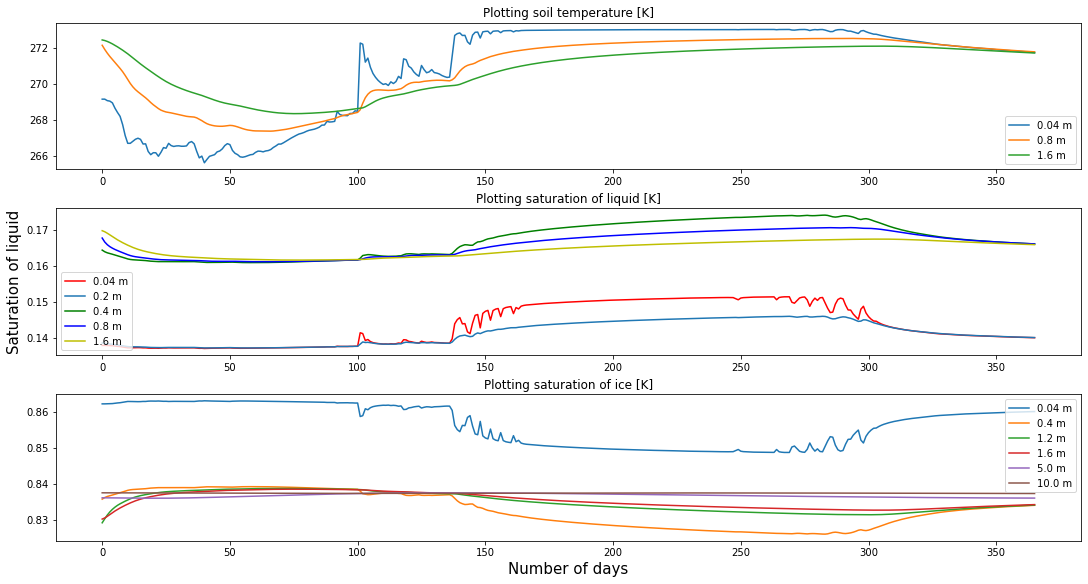

In [15]:
### Plotting the final results (mesured vs simulated) along with the parameters:

fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case3_obs['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_case1['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_case1['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(case3_obs['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_case1['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(case3_obs['point -1.6 temperature [K]'],label='1.6 m')
#f2_ax1.plot(case3_obs['point -5.0 temperature [K]'],label='5.0 m')
#f2_ax1.plot(df_case1['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(case3_obs['point -20.0 temperature [K]'],label='20.0 m')
#f2_ax1.plot(case3_obs['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case3_obs['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(case3_obs['point -0.2 saturation liquid'],label='0.2 m')
f2_ax2.plot(case3_obs['point -0.4 saturation liquid'],'g',label='0.4 m')
f2_ax2.plot(case3_obs['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(case3_obs['point -1.6 saturation liquid'],'y',label='1.6 m')
#f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'],'r--',label='s - 0.04 m')
#f2_ax2.plot(df_obs_AWS['point -0.4 saturation liquid'],'g--',label='s - 0.4 m')
#f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'],'b--',label='s - 0.8 m')
#f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'],'y--',label='s - 1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('Saturation of liquid',fontsize=15)

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case3_obs['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_case1['point -0.2 saturation ice'],label='0.2 m')
f2_ax3.plot(case3_obs['point -0.4 saturation ice'],label='0.4 m')
#f2_ax3.plot(df_case1['point -0.8 saturation ice'],label='0.8 m')
f2_ax3.plot(case3_obs['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(case3_obs['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(case3_obs['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(case3_obs['point -10.0 saturation ice'],label='10.0 m')
f2_ax3.set_xlabel('Number of days',fontsize=15)
f2_ax3.legend()

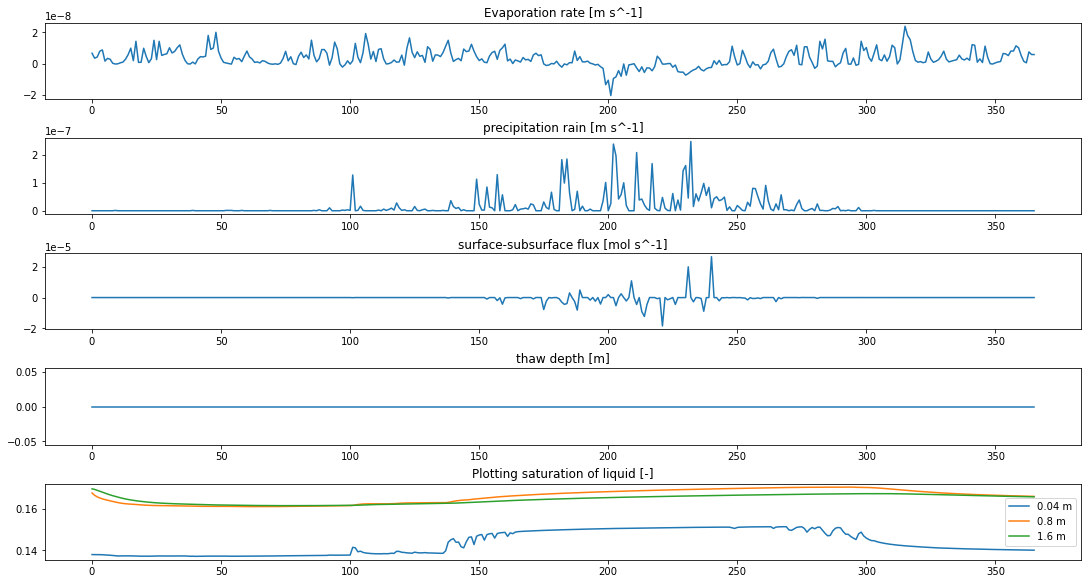

In [16]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

# Plotting Evaporation rate
f2_ax1.set_title('Evaporation rate [m s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case3_obs['evaporation rate [m s^-1]'])

# Plotting precipitation rate
f2_ax2.set_title('precipitation rain [m s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case3_obs['precipitation rain [m s^-1]'])

# Plotting surface-subsurface flux [mol s^-1]
f2_ax3.set_title('surface-subsurface flux [mol s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case3_obs['surface-subsurface flux [mol s^-1]'])

# Plotting surface-subsurface flux [mol s^-1]
f2_ax4.set_title('thaw depth [m]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(case3_obs['thaw depth [m]'])

# Plotting saturation of liquid
f2_ax5.set_title('Plotting saturation of liquid [-]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax5.plot(case3_obs['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(case1_obs['point -0.4 saturation liquid'],label='0.4 m')
f2_ax5.plot(case3_obs['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax5.plot(case3_obs['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case3_obs['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case3_obs['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax5.legend()

### Plotting the results with measured values

Text(0.5, 0, 'Days')

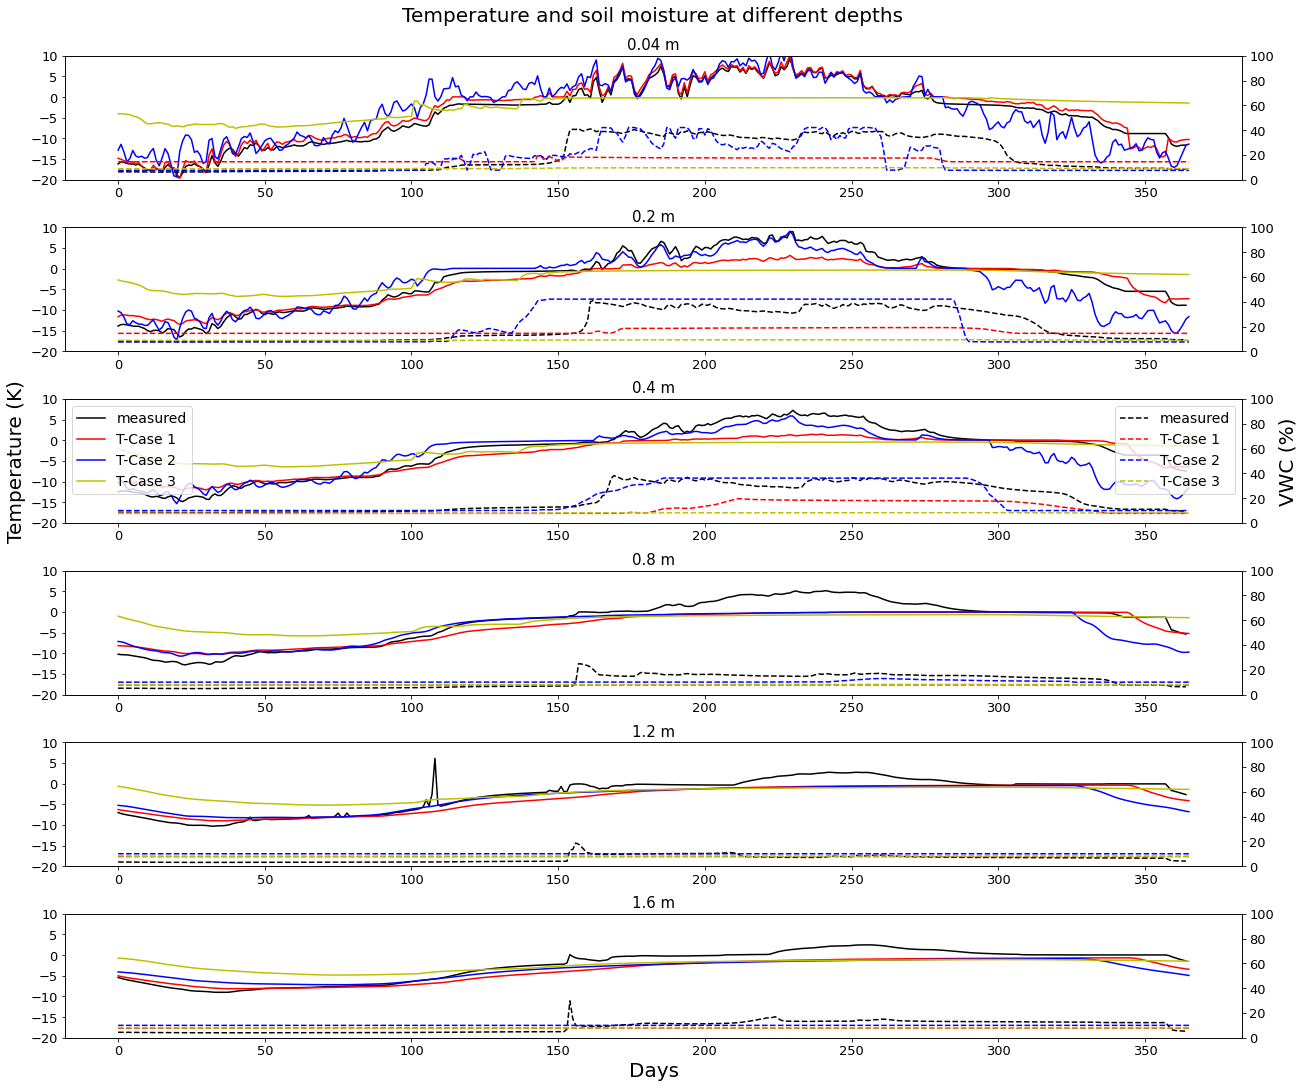

In [45]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]


for j, depth in enumerate(depths):
    
    locals()['f2_ax'+str(j+1)].plot(df_obs_AWS[f'Soil temperature at - {depth} m (°C)'], 'k', label=f'measured')
    locals()['f2_ax'+str(j+1)].plot(case1_obs[f'Soil temperature at - {depth} m (°C)'], 'r', label=f'T-Case 1')
    locals()['f2_ax'+str(j+1)].plot(case2_obs[f'Soil temperature at - {depth} m (°C)'], 'b', label=f'T-Case 2')
    locals()['f2_ax'+str(j+1)].plot(case3_obs[f'Soil temperature at - {depth} m (°C)'], 'y', label=f'T-Case 3')
    #locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_4[x:x+1096].values, 'g', label=f'T-Case 3')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    #locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(-20,10)
    
    ax2 = locals()['f2_ax'+str(j+1)].twinx()
    
    color = 'tab:blue'
    ax2.plot(df_obs_AWS[f'Soil moisture at - {depth} m (%)'], 'k--', label=f'measured')
    ax2.plot(case1_obs[f'Soil moisture at - {depth} m (%)'], 'r--', label=f'T-Case 1')
    ax2.plot(case2_obs[f'Soil moisture at - {depth} m (%)'], 'b--', label=f'T-Case 2')
    ax2.plot(case3_obs[f'Soil moisture at - {depth} m (%)'], 'y--', label=f'T-Case 3')
    #ax2.plot(time_period, mois_sim_4[x:x+1096].values, 'g--', label=f'M-Case 3')
    ax2.set_ylim(0,100)
    
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 2:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)

        ax2.legend(fontsize=14, loc=1)  
        ax2.set_ylabel('VWC (%)', fontsize=20)

f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

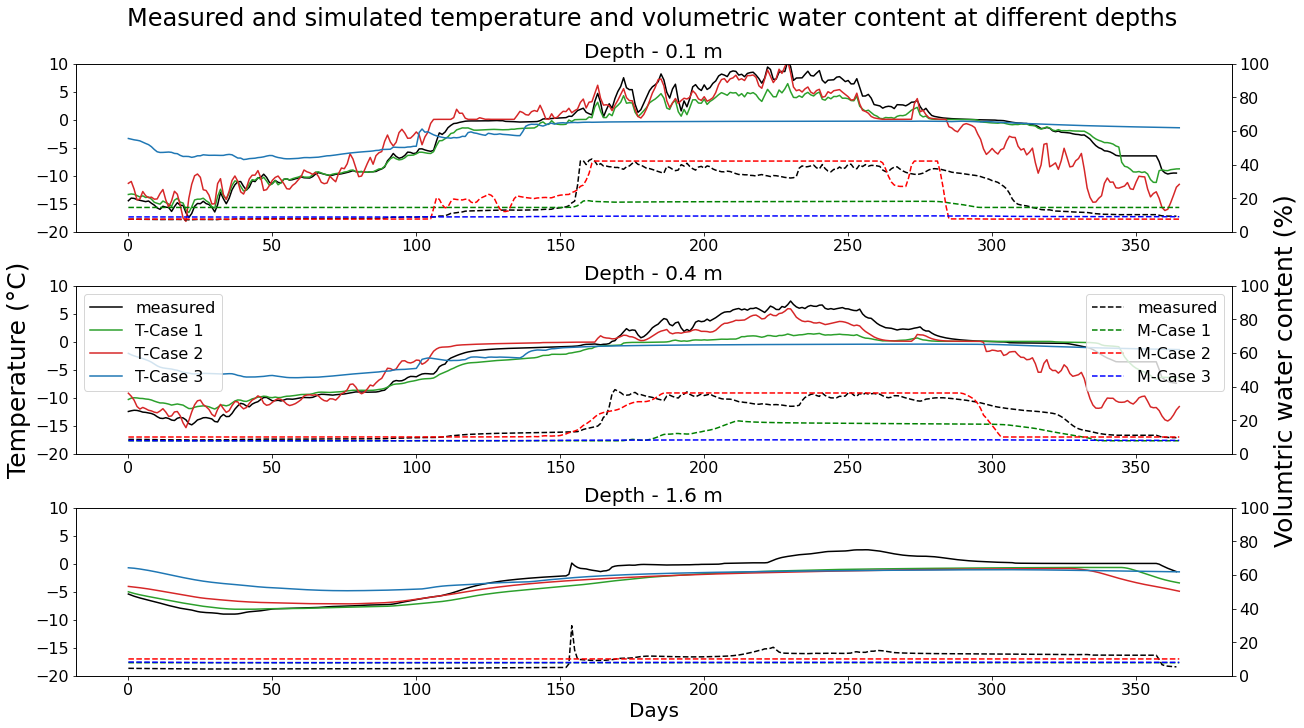

In [46]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
#f2_ax4 = fig2.add_subplot(spec2[3, 0])
#f2_ax5 = fig2.add_subplot(spec2[4, 0])
#f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Measured and simulated temperature and volumetric water content at different depths', fontsize=24)


depths = [0.1, 0.4, 1.6]


for j, depth in enumerate(depths):
    
    locals()['f2_ax'+str(j+1)].plot(df_obs_AWS[f'Soil temperature at - {depth} m (°C)'], 'k', label=f'measured')
    locals()['f2_ax'+str(j+1)].plot(case1_obs[f'Soil temperature at - {depth} m (°C)'], 'tab:green', label=f'T-Case 1')
    locals()['f2_ax'+str(j+1)].plot(case2_obs[f'Soil temperature at - {depth} m (°C)'], 'tab:red', label=f'T-Case 2')
    locals()['f2_ax'+str(j+1)].plot(case3_obs[f'Soil temperature at - {depth} m (°C)'], 'tab:blue', label=f'T-Case 3')
    #locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_4[x:x+1096].values, 'g', label=f'T-Case 3')
    locals()['f2_ax'+str(j+1)].set_title(f'Depth - {depth} m', fontsize=20)
    #locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(-20,10)
    
    ax2 = locals()['f2_ax'+str(j+1)].twinx()
    
    color = 'tab:blue'
    ax2.plot(df_obs_AWS[f'Soil moisture at - {depth} m (%)'], 'k--', label=f'measured')
    ax2.plot(case1_obs[f'Soil moisture at - {depth} m (%)'], 'g--', label=f'M-Case 1')
    ax2.plot(case2_obs[f'Soil moisture at - {depth} m (%)'], 'r--', label=f'M-Case 2')
    ax2.plot(case3_obs[f'Soil moisture at - {depth} m (%)'], 'b--', label=f'M-Case 3')
    #ax2.plot(time_period, mois_sim_4[x:x+1096].values, 'g--', label=f'M-Case 3')
    ax2.set_ylim(0,100)
    
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(16)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(16)
    
    if j == 1:
        locals()['f2_ax'+str(j+1)].legend(fontsize=16, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (°C)', fontsize=25)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)

        ax2.legend(fontsize=16, loc=1)  
        ax2.set_ylabel('Volumtric water content (%)', fontsize=25)

f2_ax3.set_xlabel('Days', fontsize=20)

* Note that the Case 3 model is compared with the 2017 dataset whereas the the other two models are for 2019 dataset. - What do we do?
* Consider dividing the dataset based on season?
* Change the colouring based on Doro's suggestion

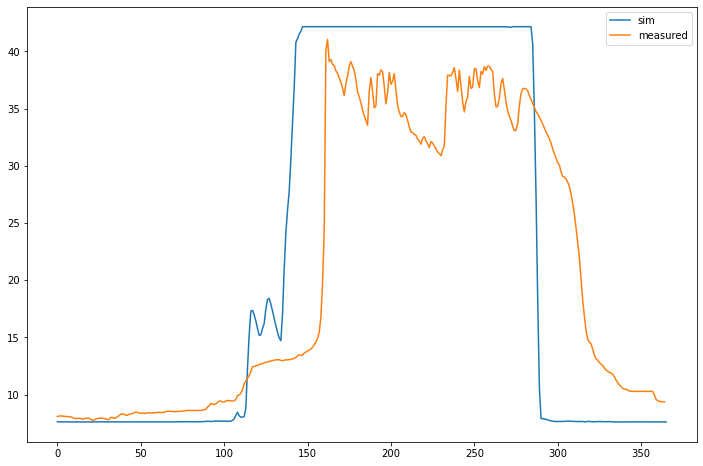

In [47]:
plt.figure(figsize=(12,8))
plt.plot(case2_obs['Soil moisture at - 0.2 m (%)'],label='sim')
plt.plot(df_obs_AWS['Soil moisture at - 0.2 m (%)'],label='measured')
plt.legend()

### 1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU)
#### a. Started with accessing the input data

### Calculating the RMSE value and NSE for the three cases

### RMSE

In [48]:
# Defining the dataframe

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

rmse_df_case1 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
rmse_df_case2 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
rmse_df_case3 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])

In [50]:
df_obs_AWS_III.head()

,TIMESTAMP,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
0,2017-01-01,8.001889,8.352500,8.502500,8.952083,5.408938,3.765458,5.415479,-12.807778,-12.126736,-11.403750,-10.977778,-9.902153,-8.312083,-5.657743,-4.284076
1,2017-01-02,8.008944,8.363681,8.515347,8.959236,5.403771,3.747493,5.377924,-13.721104,-12.143333,-11.357708,-10.903542,-9.815208,-8.296667,-5.790653,-4.451597
2,2017-01-03,8.001986,8.356250,8.513264,8.958819,5.386264,3.732201,5.312049,-13.513736,-12.295139,-11.472361,-10.965417,-9.805000,-8.309931,-5.898486,-4.594007
3,2017-01-04,8.016035,8.365417,8.515694,8.953472,5.380111,3.718479,5.282632,-12.564931,-12.117292,-11.363750,-10.923194,-9.844306,-8.356181,-5.995306,-4.716979
4,2017-01-05,8.037118,8.386875,8.527569,8.957500,5.374840,3.706326,5.251993,-12.385111,-11.802986,-11.108819,-10.740208,-9.785764,-8.384167,-6.089104,-4.832729


In [51]:
depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

# Note: Case 1 and Case 2 is for 2019
# Note: Case 3 is for 2017

# Calculating the RMSE for temperature
for j, depth in enumerate(depths):
    rmse_df_case1.iloc[j,0] = np.mean(np.power(df_obs_AWS[f'Soil temperature at - {depth} m (°C)'] - case1_obs[f'Soil temperature at - {depth} m (°C)'],2))
    rmse_df_case2.iloc[j,0] = np.mean(np.power(df_obs_AWS[f'Soil temperature at - {depth} m (°C)'] - case2_obs[f'Soil temperature at - {depth} m (°C)'],2))
    rmse_df_case3.iloc[j,0] = np.mean(np.power(df_obs_AWS_III[f'Soil temperature at - {depth} m (°C)'] - case3_obs[f'Soil temperature at - {depth} m (°C)'],2))
    
    rmse_df_case1.iloc[j,1] = np.mean(np.power(df_obs_AWS[f'Soil moisture at - {depth} m (%)'] - case1_obs[f'Soil moisture at - {depth} m (%)'],2))
    rmse_df_case2.iloc[j,1] = np.mean(np.power(df_obs_AWS[f'Soil moisture at - {depth} m (%)'] - case2_obs[f'Soil moisture at - {depth} m (%)'],2))
    rmse_df_case3.iloc[j,1] = np.mean(np.power(df_obs_AWS_III[f'Soil moisture at - {depth} m (%)'] - case3_obs[f'Soil moisture at - {depth} m (%)'],2))
    

In [52]:
rmse_df_case3

,Temperature,Moisture
0.04,34.144839,322.295366
0.10,29.22533,335.144268
0.20,25.215276,261.581891
0.40,17.669788,224.998539
0.80,12.221592,22.016357
1.20,6.41905,12.290307
1.60,5.013043,18.863571


#### NSF

In [53]:
# Defining the dataframe

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

nse_df_case1 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
nse_df_case2 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
nse_df_case3 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])


In [54]:
# Defining a Nash-Sutcliffe coefficient
def nse(targets, predictions):
    nse_value = (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
    return nse_value

In [55]:
# Test
nse(df_obs_AWS[f'Soil temperature at - 1.6 m (°C)'], case2_obs[f'Soil temperature at - 1.6 m (°C)'])

0.705265046578798

In [57]:
depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

# Note: Case 1 and Case 2 is for 2019
# Note: Case 3 is for 2017

# Calculating the RMSE for temperature
for j, depth in enumerate(depths):
    nse_df_case1.iloc[j,0] = nse(df_obs_AWS[f'Soil temperature at - {depth} m (°C)'], case1_obs[f'Soil temperature at - {depth} m (°C)'])
    nse_df_case2.iloc[j,0] = nse(df_obs_AWS[f'Soil temperature at - {depth} m (°C)'], case2_obs[f'Soil temperature at - {depth} m (°C)'])
    nse_df_case3.iloc[j,0] = nse(df_obs_AWS_III[f'Soil temperature at - {depth} m (°C)'], case3_obs[f'Soil temperature at - {depth} m (°C)'])
    
    nse_df_case1.iloc[j,1] = nse(df_obs_AWS[f'Soil moisture at - {depth} m (%)'], case1_obs[f'Soil moisture at - {depth} m (%)'])
    nse_df_case2.iloc[j,1] = nse(df_obs_AWS[f'Soil moisture at - {depth} m (%)'], case2_obs[f'Soil moisture at - {depth} m (%)'])
    nse_df_case3.iloc[j,1] = nse(df_obs_AWS_III[f'Soil moisture at - {depth} m (%)'], case3_obs[f'Soil moisture at - {depth} m (%)'])


In [58]:
nse_df_case2

,Temperature,Moisture
0.04,0.792586,0.558384
0.10,0.816855,0.657359
0.20,0.799544,0.385301
0.40,0.76881,0.786355
0.80,0.734819,0.115844
1.20,0.750307,-2.042261
1.60,0.705265,-0.049911


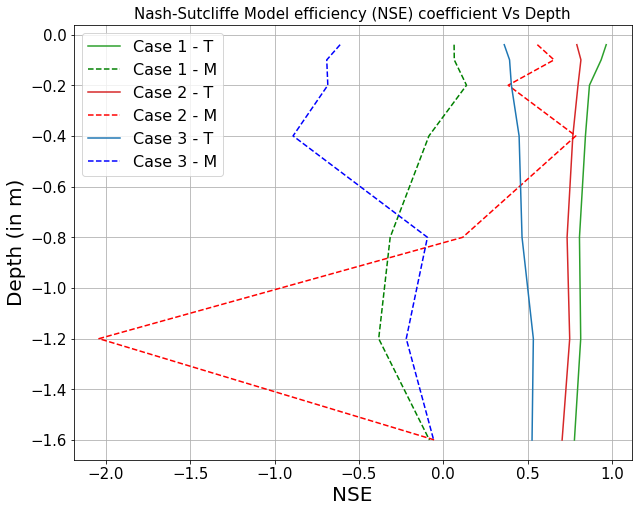

In [59]:
fig, ax = plt.subplots(figsize=(10, 8))

#plt.figure(figsize=(20, 12))

# Case 1
ax.plot(nse_df_case1.iloc[:,0], -nse_df_case1.index,'tab:green', label=f'Case 1 - T')
ax.plot(nse_df_case1.iloc[:,1], -nse_df_case1.index,'g--',label=f'Case 1 - M')

# Case 2
ax.plot(nse_df_case2.iloc[:,0], -nse_df_case1.index,'tab:red', label=f'Case 2 - T')
ax.plot(nse_df_case2.iloc[:,1], -nse_df_case1.index,'r--',label=f'Case 2 - M')

# Case 3
ax.plot(nse_df_case3.iloc[:,0], -nse_df_case1.index,'tab:blue', label=f'Case 3 - T')
ax.plot(nse_df_case3.iloc[:,1], -nse_df_case1.index,'b--',label=f'Case 3 - M')


#for i, name in enumerate(cf_names):
#    ax.plot(locals()[f'obj_fn_{i+1}']['total_phi'],label=f'{name}')
    
ax.set_title('Nash-Sutcliffe Model efficiency (NSE) coefficient Vs Depth', fontsize=15)
ax.set_ylabel('Depth (in m)', fontsize=20)
ax.set_xlabel('NSE', fontsize=20)
ax.grid(b=True)
ax.legend(fontsize=16)

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)

In [60]:
nse_df_case1.mean()

Temperature    0.859553
Moisture      -0.085071
dtype: float64

In [61]:
nse_df_case2.mean()

Temperature    0.766884
Moisture       0.058724
dtype: float64

In [62]:
nse_df_case3.mean()

Temperature    0.448447
Moisture      -0.463918
dtype: float64

In [64]:
nse_df_mean = pd.DataFrame(columns=['Temperature','Moisture'],index=['Case 1','Case 2','Case 3'])

for i in np.arange(len(nse_df_mean)):
    nse_df_mean.iloc[i,:] = locals()['nse_df_case'+str(i+1)].mean()

nse_df_mean = nse_df_mean.astype('float')

nse_df_mean =  np.round(nse_df_mean,2)

nse_df_mean

,Temperature,Moisture
Case 1,0.86,-0.09
Case 2,0.77,0.06
Case 3,0.45,-0.46


##### $R^2$ (Coefficient of determination)

Link: https://en.wikipedia.org/wiki/Coefficient_of_determination

$$R^2 = 1 - \frac{RSS}{TSS}$$

Where RSS is the sum of squared residuals, TSS is the total sum of squares (Related to the variance of the data)

Let y be the measured values and x be the simulated values (after calibration)

$$\bar{y} = \frac{1}{n}\sum_{i=1}^{n} (y_i)$$

$$RSS = \sum_{i=1}^{n} (y_i - x_i)^2$$

$$TSS = \sum_{i=1}^{n} (y_i - \bar{y})^2$$

In the best case, the modeled values exactly match the observed values, which results in TSS = 0 and $ R^{2}=1$. A baseline model, which always predicts $\bar{y}$, will have  $R^{2}=0$. Models that have worse predictions than this baseline will have a negative $R^{2}$.

In [196]:
# Defining the dataframe

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

coef_det_df_case1 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
coef_det_df_case2 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
coef_det_df_case3 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])

In [210]:
# Test
depth = 1.2

RSS = (np.sum(np.power(df_obs_AWS[f'Soil temperature at - {depth} m (°C)'] - case1_obs[f'Soil temperature at - {depth} m (°C)'],2)))
TSS = (np.sum(np.power(df_obs_AWS[f'Soil temperature at - {depth} m (°C)'] - df_obs_AWS[f'Soil temperature at - {depth} m (°C)'].mean(),2)))

coef_det = 1 - RSS/TSS

coef_det

0.8156070040151424

In [221]:
depth = 0.1
1 - (np.sum(np.power(df_obs_AWS[f'Soil moisture at - {depth} m (%)'] - case1_obs[f'Soil moisture at - {depth} m (%)'],2)))/(np.sum(np.power(df_obs_AWS[f'Soil moisture at - {depth} m (%)'] - df_obs_AWS[f'Soil moisture at - {depth} m (%)'].mean(),2)))

0.06564752466446366

In [222]:
coef_det_df_case1

,Temperature,Moisture
0.04,0.966879,0.064524
0.10,0.936781,0.065648
0.20,0.867452,0.138155
0.40,0.843631,-0.084719
0.80,0.80821,-0.314615
1.20,0.815607,-0.382747
1.60,0.778309,-0.081745


In [211]:
depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

# Note: Case 1 and Case 2 is for 2019
# Note: Case 3 is for 2017

# Calculating the RMSE for temperature and moisture
for j, depth in enumerate(depths):
    # Temperature
    coef_det_df_case1.iloc[j,0] = 1 - (np.sum(np.power(df_obs_AWS[f'Soil temperature at - {depth} m (°C)'] - case1_obs[f'Soil temperature at - {depth} m (°C)'],2)))/(np.sum(np.power(df_obs_AWS[f'Soil temperature at - {depth} m (°C)'] - df_obs_AWS[f'Soil temperature at - {depth} m (°C)'].mean(),2)))
    coef_det_df_case2.iloc[j,0] = 1 - (np.sum(np.power(df_obs_AWS[f'Soil temperature at - {depth} m (°C)'] - case2_obs[f'Soil temperature at - {depth} m (°C)'],2)))/(np.sum(np.power(df_obs_AWS[f'Soil temperature at - {depth} m (°C)'] - df_obs_AWS[f'Soil temperature at - {depth} m (°C)'].mean(),2)))
    coef_det_df_case3.iloc[j,0] = 1 - (np.sum(np.power(df_obs_AWS_III[f'Soil temperature at - {depth} m (°C)'] - case3_obs[f'Soil temperature at - {depth} m (°C)'],2)))/(np.sum(np.power(df_obs_AWS_III[f'Soil temperature at - {depth} m (°C)'] - df_obs_AWS_III[f'Soil temperature at - {depth} m (°C)'].mean(),2)))
    
    # Moisture
    coef_det_df_case1.iloc[j,1] = 1 - (np.sum(np.power(df_obs_AWS[f'Soil moisture at - {depth} m (%)'] - case1_obs[f'Soil moisture at - {depth} m (%)'],2)))/(np.sum(np.power(df_obs_AWS[f'Soil moisture at - {depth} m (%)'] - df_obs_AWS[f'Soil moisture at - {depth} m (%)'].mean(),2)))
    coef_det_df_case2.iloc[j,1] = 1 - (np.sum(np.power(df_obs_AWS[f'Soil moisture at - {depth} m (%)'] - case2_obs[f'Soil moisture at - {depth} m (%)'],2)))/(np.sum(np.power(df_obs_AWS[f'Soil moisture at - {depth} m (%)'] - df_obs_AWS[f'Soil moisture at - {depth} m (%)'].mean(),2)))
    coef_det_df_case3.iloc[j,1] = 1 - (np.sum(np.power(df_obs_AWS_III[f'Soil moisture at - {depth} m (%)'] - case3_obs[f'Soil moisture at - {depth} m (%)'],2)))/(np.sum(np.power(df_obs_AWS_III[f'Soil moisture at - {depth} m (%)'] - df_obs_AWS_III[f'Soil moisture at - {depth} m (%)'].mean(),2)))

In [214]:
coef_det_df_case3

,Temperature,Moisture
0.04,0.36196,-0.611595
0.10,0.393583,-0.690887
0.20,0.404347,-0.684636
0.40,0.450129,-0.890766
0.80,0.467537,-0.093659
1.20,0.534653,-0.219242
1.60,0.526919,-0.056637


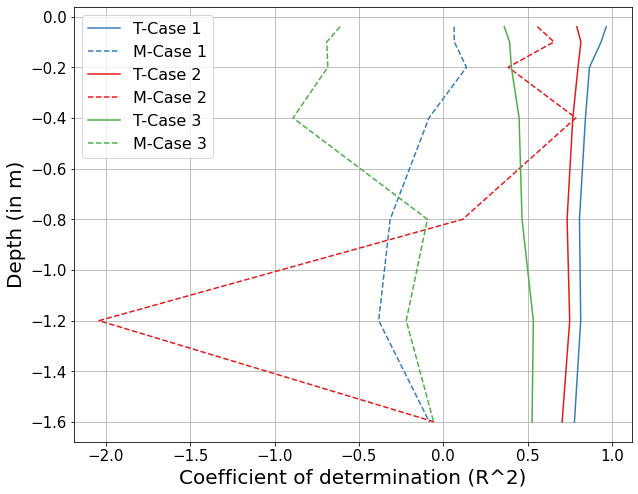

In [223]:
fig, ax = plt.subplots(figsize=(10, 8))

#plt.figure(figsize=(20, 12))

# Case 1
ax.plot(coef_det_df_case1.iloc[:,0], -coef_det_df_case1.index,'#377eb8', label=f'T-Case 1')
ax.plot(coef_det_df_case1.iloc[:,1], -coef_det_df_case1.index,'#377eb8', linestyle='dashed', label=f'M-Case 1')

# Case 2
ax.plot(coef_det_df_case2.iloc[:,0], -coef_det_df_case1.index,'#e41a1c', label=f'T-Case 2')
ax.plot(coef_det_df_case2.iloc[:,1], -coef_det_df_case1.index,'#e41a1c', linestyle='dashed',label=f'M-Case 2')

# Case 3
ax.plot(coef_det_df_case3.iloc[:,0], -coef_det_df_case1.index,'#4daf4a', label=f'T-Case 3')
ax.plot(coef_det_df_case3.iloc[:,1], -coef_det_df_case1.index,'#4daf4a', linestyle='dashed',label=f'M-Case 3')


#for i, name in enumerate(cf_names):
#    ax.plot(locals()[f'obj_fn_{i+1}']['total_phi'],label=f'{name}')
    
#ax.set_title('Nash-Sutcliffe Model efficiency (coef_det) coefficient Vs Depth', fontsize=15)
ax.set_ylabel('Depth (in m)', fontsize=20)
ax.set_xlabel('Coefficient of determination (R^2)', fontsize=20)
ax.grid(b=True)
ax.legend(fontsize=16)

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)


#plt.savefig('Valid_coef_det.jpg',dpi=300)

Comments: It is the same as NSF, however the observed and simulated values in NSF is better represented. In R^2, the there is a ependency between y and x (which does not exist in NSF). - https://stats.stackexchange.com/questions/185898/difference-between-nash-sutcliffe-efficiency-and-coefficient-of-determination


In [ ]:
### Comparing the 